In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test', 'sample_submission.csv', 'train.csv', 'train']


In [12]:
labels = pd.read_csv('../input/train.csv')

In [13]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [14]:
model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])


In [15]:
labels['class'] = 'no_cactus'
labels.loc[labels['has_cactus'] == 1 ,['class']] = "cactus"
labels.head()


,id,has_cactus,class
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1,cactus
1,000c8a36845c0208e833c79c1bffedd1.jpg,1,cactus
2,000d1e9a533f62e55c289303b072733d.jpg,1,cactus
3,0011485b40695e9138e92d0b3fb55128.jpg,1,cactus
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1,cactus


In [16]:
# splitting data into train and validation
from sklearn.model_selection import train_test_split
train, valid = train_test_split(labels, stratify=labels.has_cactus, test_size=0.2)

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   # rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   # shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_dataframe(train,
                                                    directory="../input/train/train", 
                                                    x_col='id', 
                                                    y_col='class',
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (32, 32), 
                                                    color_mode='rgb')     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_dataframe( valid,
                                                          directory="../input/train/train", 
                                                          x_col='id', 
                                                          y_col='class',
                                                          batch_size  = 50,
                                                          class_mode  = 'binary', 
                                                          target_size = (32, 32), 
                                                          color_mode='rgb')

Found 14000 images belonging to 2 classes.
Found 3500 images belonging to 2 classes.


In [18]:
history = model.fit_generator(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 120,
            validation_steps = 50,
            verbose = 2)

Epoch 1/120
70/70 [==============================] - 3s 41ms/step - loss: 0.2791 - acc: 0.9014
 - 33s - loss: 0.3499 - acc: 0.8521 - val_loss: 0.2791 - val_acc: 0.9014
Epoch 2/120
70/70 [==============================] - 3s 44ms/step - loss: 0.1975 - acc: 0.9237
 - 33s - loss: 0.2558 - acc: 0.9064 - val_loss: 0.1975 - val_acc: 0.9237
Epoch 3/120
70/70 [==============================] - 3s 42ms/step - loss: 0.2302 - acc: 0.9140
 - 33s - loss: 0.2373 - acc: 0.9130 - val_loss: 0.2302 - val_acc: 0.9140
Epoch 4/120
70/70 [==============================] - 3s 44ms/step - loss: 0.3309 - acc: 0.8846
 - 34s - loss: 0.2262 - acc: 0.9151 - val_loss: 0.3309 - val_acc: 0.8846
Epoch 5/120
70/70 [==============================] - 3s 39ms/step - loss: 0.3514 - acc: 0.8709
 - 34s - loss: 0.2181 - acc: 0.9157 - val_loss: 0.3514 - val_acc: 0.8709
Epoch 6/120
70/70 [==============================] - 3s 47ms/step - loss: 0.2480 - acc: 0.9074
 - 33s - loss: 0.2122 - acc: 0.9196 - val_loss: 0.2480 - val_acc:

70/70 [==============================] - 3s 42ms/step - loss: 0.0922 - acc: 0.9634
 - 33s - loss: 0.0692 - acc: 0.9763 - val_loss: 0.0922 - val_acc: 0.9634
Epoch 50/120
70/70 [==============================] - 3s 45ms/step - loss: 0.0459 - acc: 0.9843
 - 33s - loss: 0.0676 - acc: 0.9771 - val_loss: 0.0459 - val_acc: 0.9843
Epoch 51/120
70/70 [==============================] - 3s 41ms/step - loss: 0.0592 - acc: 0.9794
 - 34s - loss: 0.0648 - acc: 0.9772 - val_loss: 0.0592 - val_acc: 0.9794
Epoch 52/120
70/70 [==============================] - 3s 41ms/step - loss: 0.0558 - acc: 0.9803
 - 32s - loss: 0.0685 - acc: 0.9762 - val_loss: 0.0558 - val_acc: 0.9803
Epoch 53/120
70/70 [==============================] - 3s 43ms/step - loss: 0.0775 - acc: 0.9731
 - 34s - loss: 0.0648 - acc: 0.9784 - val_loss: 0.0775 - val_acc: 0.9731
Epoch 54/120
70/70 [==============================] - 3s 44ms/step - loss: 0.0403 - acc: 0.9843
 - 36s - loss: 0.0622 - acc: 0.9780 - val_loss: 0.0403 - val_acc: 0.9843

 - 34s - loss: 0.0635 - acc: 0.9812 - val_loss: 0.0842 - val_acc: 0.9723
Epoch 98/120
70/70 [==============================] - 3s 41ms/step - loss: 0.0493 - acc: 0.9826
 - 32s - loss: 0.0627 - acc: 0.9809 - val_loss: 0.0493 - val_acc: 0.9826
Epoch 99/120
70/70 [==============================] - 3s 41ms/step - loss: 0.0887 - acc: 0.9737
 - 33s - loss: 0.0642 - acc: 0.9807 - val_loss: 0.0887 - val_acc: 0.9737
Epoch 100/120
70/70 [==============================] - 3s 48ms/step - loss: 0.0366 - acc: 0.9863
 - 33s - loss: 0.0586 - acc: 0.9821 - val_loss: 0.0366 - val_acc: 0.9863
Epoch 101/120
70/70 [==============================] - 3s 41ms/step - loss: 0.0383 - acc: 0.9869
 - 33s - loss: 0.0625 - acc: 0.9803 - val_loss: 0.0383 - val_acc: 0.9869
Epoch 102/120
70/70 [==============================] - 3s 40ms/step - loss: 0.0393 - acc: 0.9869
 - 33s - loss: 0.0644 - acc: 0.9800 - val_loss: 0.0393 - val_acc: 0.9869
Epoch 103/120
70/70 [==============================] - 3s 42ms/step - loss: 0.0

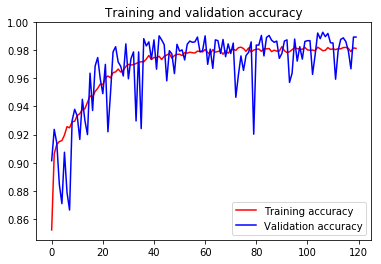

<Figure size 432x288 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [20]:
classes = model.predict(validation_generator)
print(classes)

[[0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 ...
 [0.0000000e+00]
 [5.0008987e-18]
 [3.5083517e-22]]


In [21]:
to_submit = pd.read_csv('../input/sample_submission.csv')

In [22]:
to_submit.head()

,id,has_cactus
0,000940378805c44108d287872b2f04ce.jpg,0.5
1,0017242f54ececa4512b4d7937d1e21e.jpg,0.5
2,001ee6d8564003107853118ab87df407.jpg,0.5
3,002e175c3c1e060769475f52182583d0.jpg,0.5
4,0036e44a7e8f7218e9bc7bf8137e4943.jpg,0.5


In [23]:
# Note that the validation data should not be augmented!
submission_datagen = ImageDataGenerator( rescale = 1.0/255. )
submission_generator =  submission_datagen.flow_from_dataframe( to_submit,
                                                          directory="../input/test/test", 
                                                          x_col='id', 
                                                          y_col=None,
                                                          shuffle=False,
                                                          batch_size  = 50,
                                                          class_mode  = None, 
                                                          target_size = (32, 32), 
                                                          color_mode='rgb')


Found 4000 images.


In [24]:
classes = model.predict(submission_generator)
print(classes)

[[3.24845314e-06]
 [0.00000000e+00]
 [9.99997258e-01]
 ...
 [0.00000000e+00]
 [1.17973414e-07]
 [2.34955472e-10]]


In [25]:
to_submit['has_cactus'] = classes
to_submit.head(10)

,id,has_cactus
0,000940378805c44108d287872b2f04ce.jpg,0.000003
1,0017242f54ececa4512b4d7937d1e21e.jpg,0.000000
2,001ee6d8564003107853118ab87df407.jpg,0.999997
3,002e175c3c1e060769475f52182583d0.jpg,0.989332
4,0036e44a7e8f7218e9bc7bf8137e4943.jpg,0.035610
5,0038ed6f7417b8275b393307f66cb1e3.jpg,0.000000
6,0059dfa41de4441fc23b9a4b98ba99cb.jpg,0.000000
7,0061bd302d735db829418cb90b4e6040.jpg,0.000000
8,00754573d8c7223e73da553dd43780bd.jpg,0.000000
9,008d9fce71c8e03a4c9cdd15ea908573.jpg,0.997899


In [26]:
to_submit.to_csv('samplesubmission.csv',index=False)